# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('new_data_set.xlsx')

columns_to_check= ['facilityid', 'age', 'sex', 'time_erst_to_diag', 'mgfaklassifikation_schlimmste_historisch', 'dekrement_testergebnis', 'ee_autoimmunerkrankungen_rbzu', 
                   'ee_thymektomie_gr', 'kortison_aktuell', 'azathioprin_aktuell', 'mycophenolatmofetil_aktuell', 'methotrexatfolsauure_aktuell','rituximab_aktuell',
                   'scoreqmg_neu', 'chronicfatigue_neu', 'scoreqol_neu', 'scoreadl_neu', 'aktueller_mgfa_score', 'seronegative']

df_original= df[columns_to_check]
df_original.head()

,facilityid,age,sex,time_erst_to_diag,mgfaklassifikation_schlimmste_historisch,dekrement_testergebnis,ee_autoimmunerkrankungen_rbzu,ee_thymektomie_gr,kortison_aktuell,azathioprin_aktuell,mycophenolatmofetil_aktuell,methotrexatfolsauure_aktuell,rituximab_aktuell,scoreqmg_neu,chronicfatigue_neu,scoreqol_neu,scoreadl_neu,aktueller_mgfa_score,seronegative
0,2019009,34.961111,0,0.166667,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,2.0,3.0,0.0
1,2019006,59.711111,1,3.166667,2.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,0,1.0,NaN,NaN,NaN,2.0,0.0
2,2019010,83.344444,1,0.250000,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,5.0,12.0,7.0,3.0,2.0,0.0
3,2019019,56.505556,1,0.083333,2.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0,4.0,8.0,NaN,NaN,2.0,0.0
4,2019004,39.986111,0,0.000000,5.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,10.0,1.0,3.0,0.0


# Handling Missing Values: MICE Imputation (Decision Tree Regressor)

In [3]:
# Define the columns
continuous_columns = ['age', 'time_erst_to_diag', 'scoreqmg_neu', 'chronicfatigue_neu', 'scoreqol_neu', 'scoreadl_neu']

categorical_columns = ['sex', 'mgfaklassifikation_schlimmste_historisch', 'dekrement_testergebnis', 'ee_autoimmunerkrankungen_rbzu',
                       'ee_thymektomie_gr', 'kortison_aktuell', 'azathioprin_aktuell', 'mycophenolatmofetil_aktuell', 
                       'methotrexatfolsauure_aktuell', 'aktueller_mgfa_score', 'seronegative']

# Custom function for rounding categorical variables
def round_categorical(imputed_data, categorical_columns):
    imputed_data[categorical_columns] = imputed_data[categorical_columns].round().astype(int)
    return imputed_data

# Custom function to enforce non-negative values on continuous columns
def enforce_non_negative(df, continuous_columns):
    df[continuous_columns] = df[continuous_columns].applymap(lambda x: max(x, 0))
    return df

In [4]:
# Tune DecisionTreeRegressor
dt_estimator = DecisionTreeRegressor(max_depth=20,        
                                     min_samples_split=5, 
                                     min_samples_leaf=3,
                                     random_state=0)

# Initialize the MICE imputer with tuned DecisionTreeRegressor
mice_imputer = IterativeImputer(estimator=dt_estimator, 
                                max_iter=30,  
                                random_state=0, 
                                tol=1e-4,  
                                n_nearest_features=10,  
                                initial_strategy='median')

In [5]:
# Fit and transform the dataset
df_imputed = mice_imputer.fit_transform(df_original)

# Convert the imputed result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_original.columns)

# Apply rounding to categorical variables
df_imputed = round_categorical(df_imputed, categorical_columns)

# Enforce non-negative values
df_imputed = enforce_non_negative(df_imputed, continuous_columns)

# Output the imputed dataset
df_imputed_dataset = df_imputed
df_imputed_dataset.head()

,facilityid,age,sex,time_erst_to_diag,mgfaklassifikation_schlimmste_historisch,dekrement_testergebnis,ee_autoimmunerkrankungen_rbzu,ee_thymektomie_gr,kortison_aktuell,azathioprin_aktuell,mycophenolatmofetil_aktuell,methotrexatfolsauure_aktuell,rituximab_aktuell,scoreqmg_neu,chronicfatigue_neu,scoreqol_neu,scoreadl_neu,aktueller_mgfa_score,seronegative
0,2019009.0,34.961111,0,0.166667,8,1,0,1,0,0,0,0,0.0,0.0,13.6,12.250000,2.00,3,0
1,2019006.0,59.711111,1,3.166667,2,1,0,0,0,0,1,0,0.0,1.0,13.6,11.333333,6.00,2,0
2,2019010.0,83.344444,1,0.250000,5,0,1,0,0,0,1,0,0.0,5.0,12.0,7.000000,3.00,2,0
3,2019019.0,56.505556,1,0.083333,2,0,0,0,1,1,0,0,0.0,4.0,8.0,15.600000,5.25,2,0
4,2019004.0,39.986111,0,0.000000,5,1,1,0,0,1,0,0,0.0,4.6,10.0,10.000000,1.00,3,0


In [6]:
# Calculate frequencies and distributions for original dataset

summary_stats= df_imputed_dataset.describe(include= 'all').T
summary_stats_rounded= summary_stats.round(2)
summary_stats_rounded

,count,mean,std,min,25%,50%,75%,max
facilityid,2233.0,2019005.64,5.09,2019001.0,2019001.00,2019004.00,2019008.00,2019021.00
age,2233.0,60.06,17.72,0.0,48.89,62.53,73.73,101.00
sex,2233.0,0.45,0.50,0.0,0.00,0.00,1.00,1.00
time_erst_to_diag,2233.0,1.50,3.73,0.0,0.08,0.25,1.00,46.83
mgfaklassifikation_schlimmste_historisch,2233.0,2.97,1.70,0.0,2.00,3.00,4.00,8.00
dekrement_testergebnis,2233.0,0.55,0.50,0.0,0.00,1.00,1.00,1.00
ee_autoimmunerkrankungen_rbzu,2233.0,0.26,0.44,0.0,0.00,0.00,1.00,1.00
ee_thymektomie_gr,2233.0,0.39,0.49,0.0,0.00,0.00,1.00,1.00
kortison_aktuell,2233.0,0.57,0.49,0.0,0.00,1.00,1.00,1.00
azathioprin_aktuell,2233.0,0.45,0.50,0.0,0.00,0.00,1.00,1.00


# Plotting the distributions of continuous variables for both original and imputed data

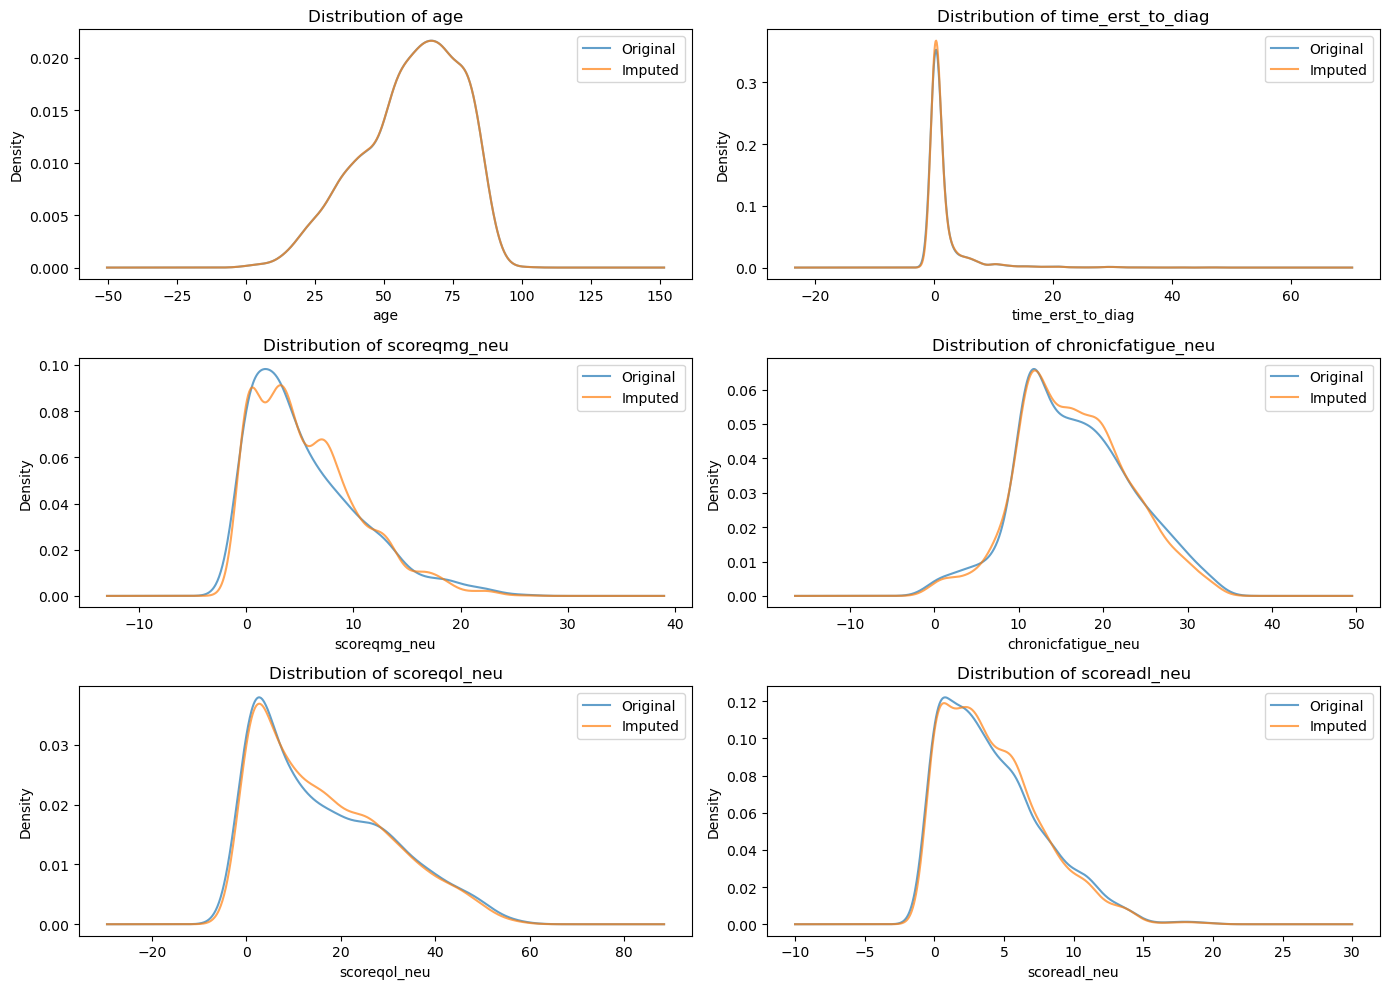

In [7]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(continuous_columns):
    plt.subplot(3, 2, i+1)
    df_original[col].plot(kind='density', label='Original', alpha=0.7)
    df_imputed_dataset[col].plot(kind='density', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting the distributions of categorical variables for both original and imputed data

In [8]:
categorical_columns_1= ['mgfaklassifikation_schlimmste_historisch', 'dekrement_testergebnis', 'ee_autoimmunerkrankungen_rbzu', 'ee_thymektomie_gr', 'kortison_aktuell']
categorical_columns_2= ['azathioprin_aktuell', 'mycophenolatmofetil_aktuell', 'methotrexatfolsauure_aktuell', 'aktueller_mgfa_score', 'seronegative']

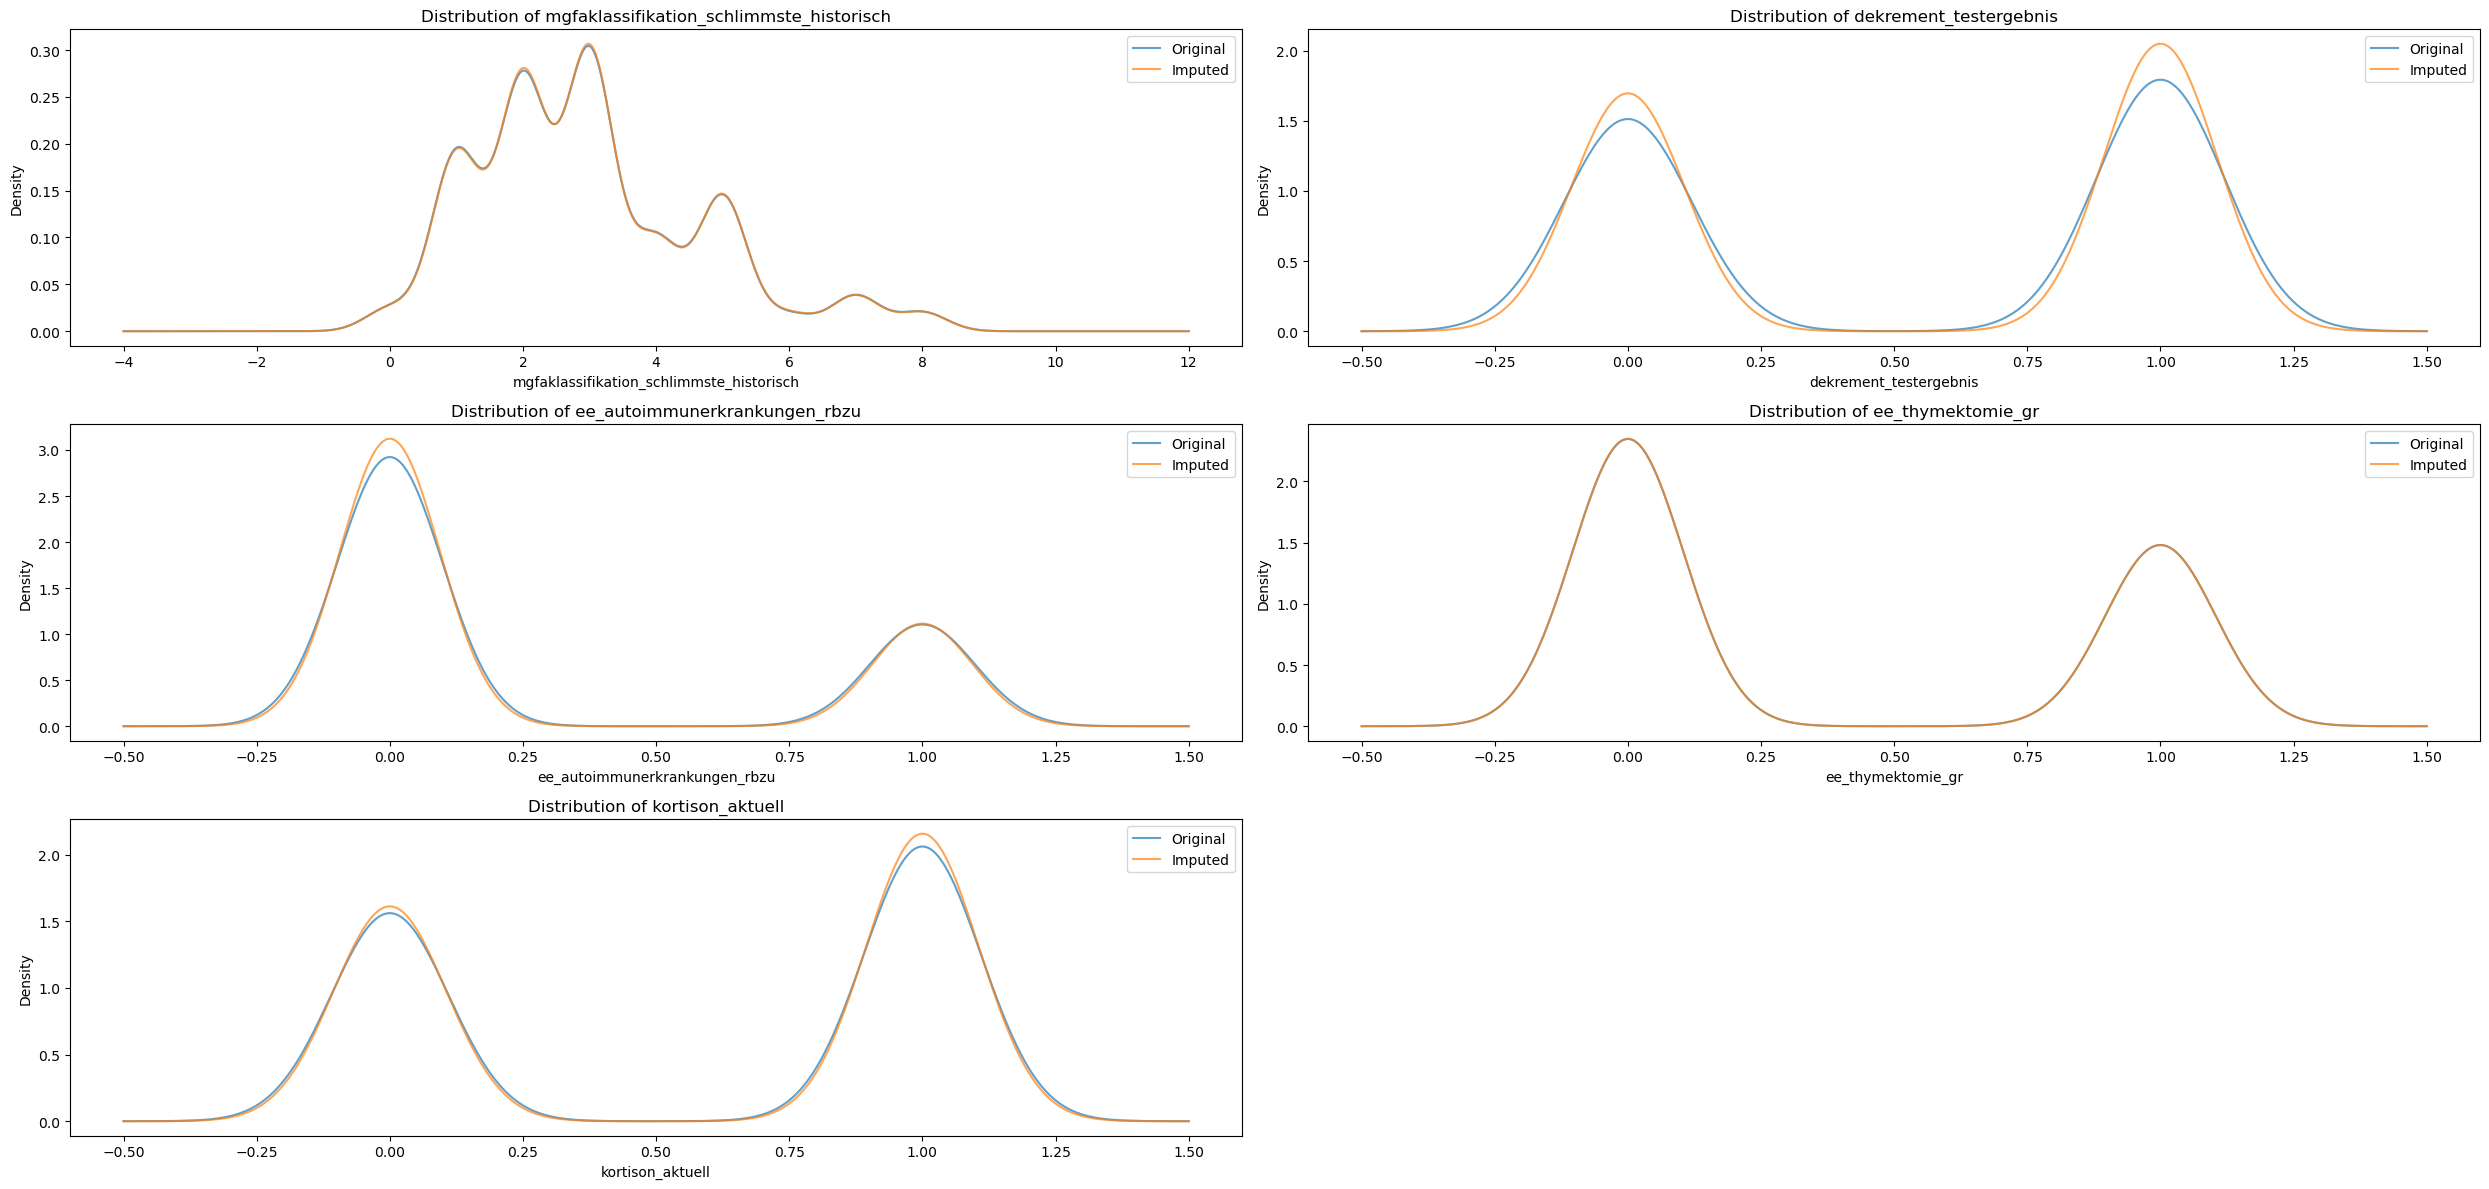

In [9]:
plt.figure(figsize=(25, 12))

for i, col in enumerate(categorical_columns_1):
    plt.subplot(3, 2, i+1)
    df_original[col].plot(kind='density', label='Original', alpha=0.7)
    df_imputed_dataset[col].plot(kind='density', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

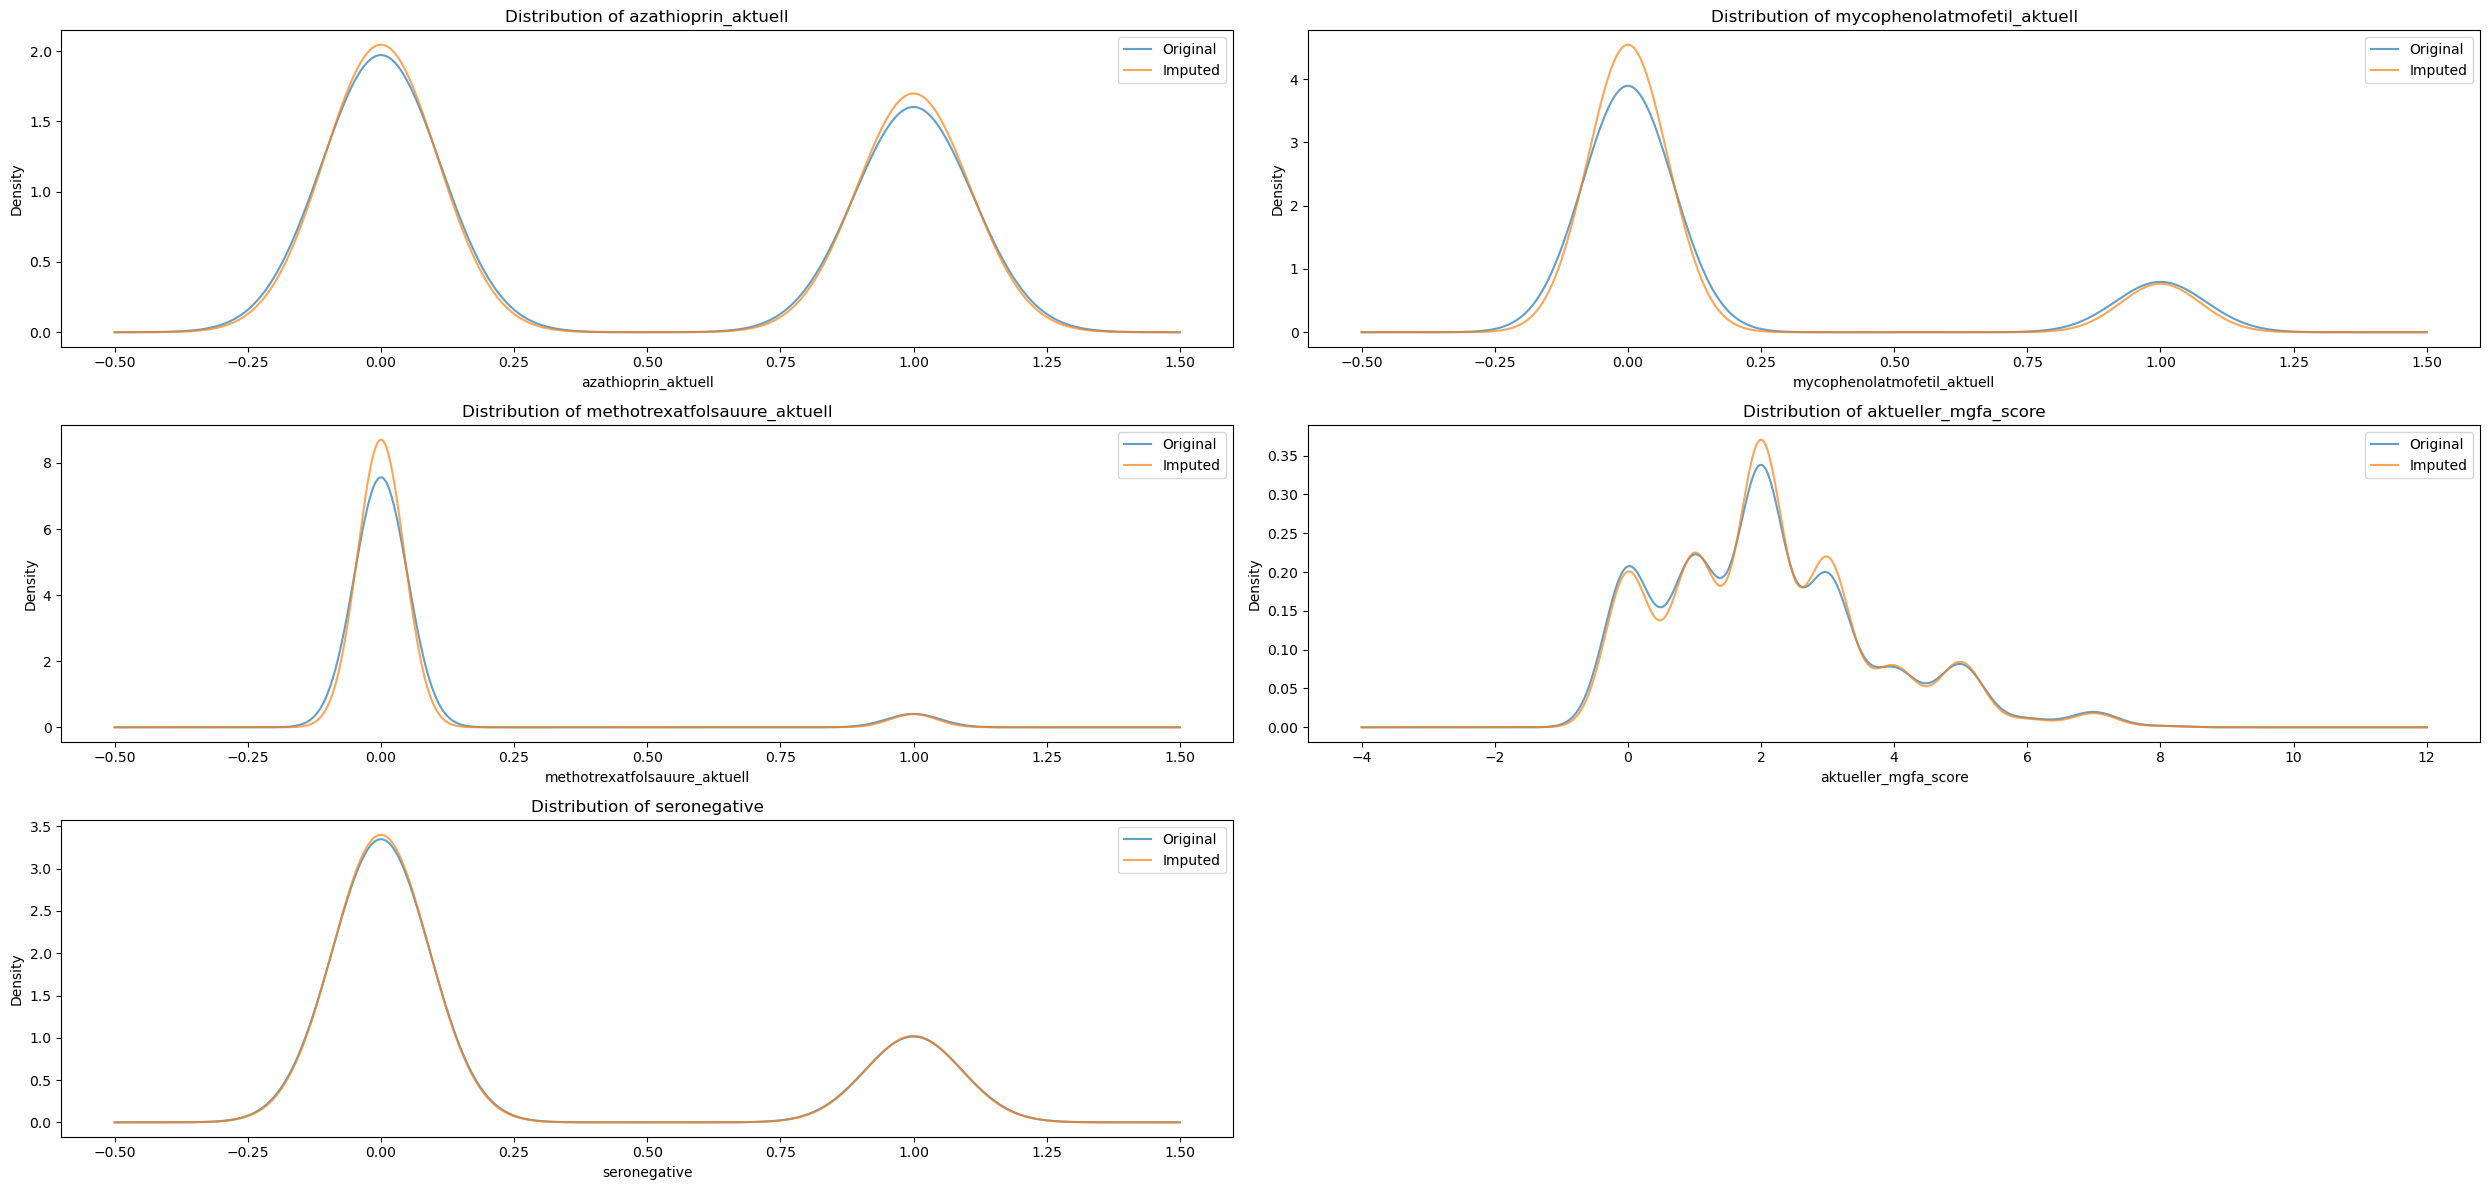

In [10]:
plt.figure(figsize=(25, 12))

for i, col in enumerate(categorical_columns_2):
    plt.subplot(3, 2, i+1)
    df_original[col].plot(kind='density', label='Original', alpha=0.7)
    df_imputed_dataset[col].plot(kind='density', label='Imputed', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting for Score Columns

In [11]:
# Score Columns
score_columns = ['scoreqmg_neu', 'chronicfatigue_neu', 'scoreqol_neu', 'scoreadl_neu', 'aktueller_mgfa_score']

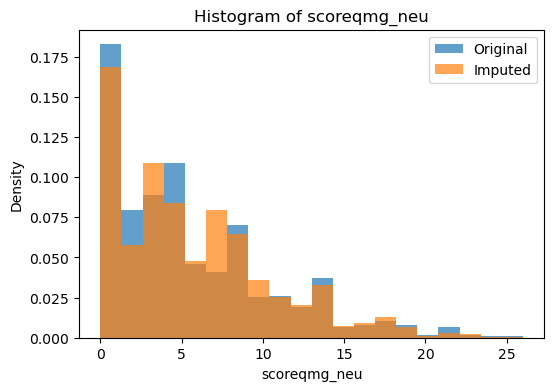

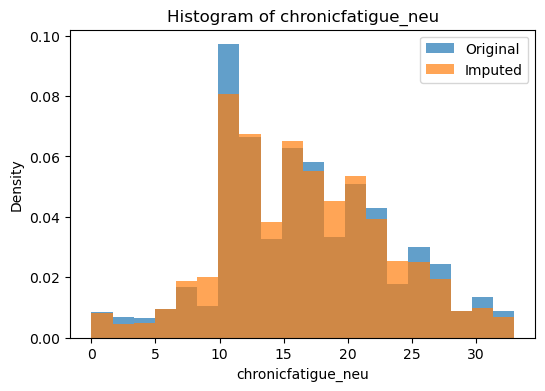

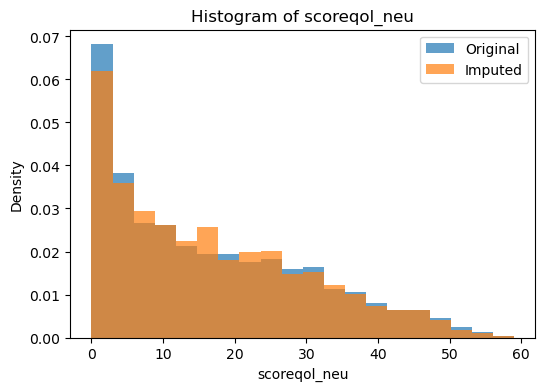

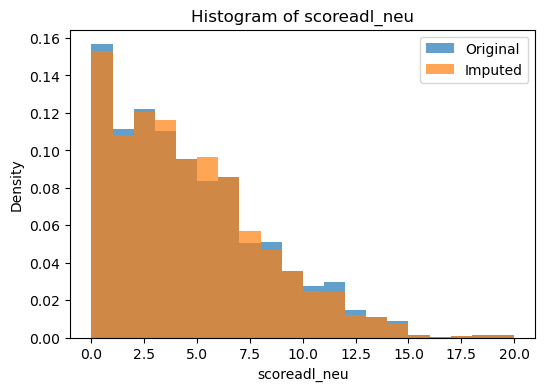

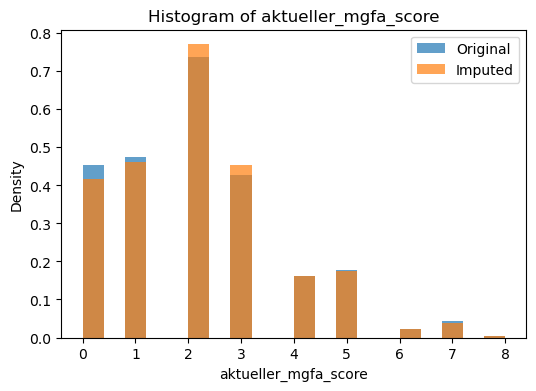

In [12]:
# Plotting histograms for each score column separately
for col in score_columns:
    plt.figure(figsize=(6, 4))
    df_original[col].plot(kind='hist', bins=20, alpha=0.7, label='Original', density=True)
    df_imputed_dataset[col].plot(kind='hist', bins=20, alpha=0.7, label='Imputed', density=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Box Plot between score variables and 'seronegative' for both Original and Imputed data

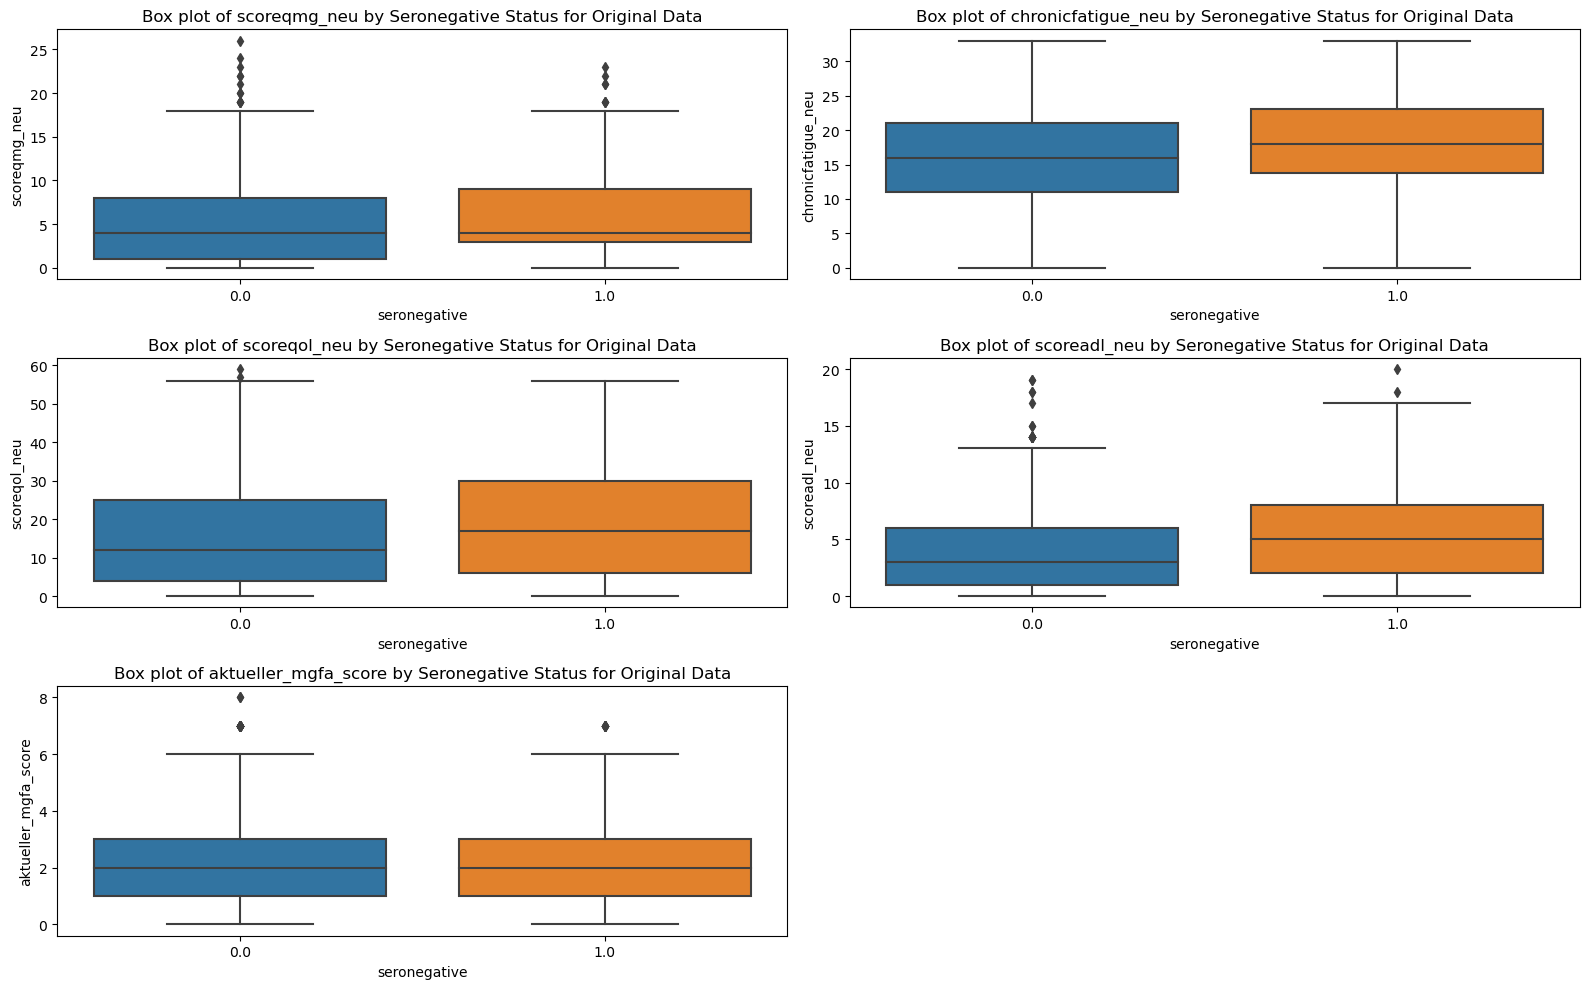

In [13]:
# Plotting boxplots for original data
plt.figure(figsize=(16, 10))

for i, col in enumerate(score_columns):
    plt.subplot(3, 2, i+1)  
    sns.boxplot(x='seronegative', y=col, data=df_original)
    plt.title(f'Box plot of {col} by Seronegative Status for Original Data')

plt.tight_layout()
plt.show()

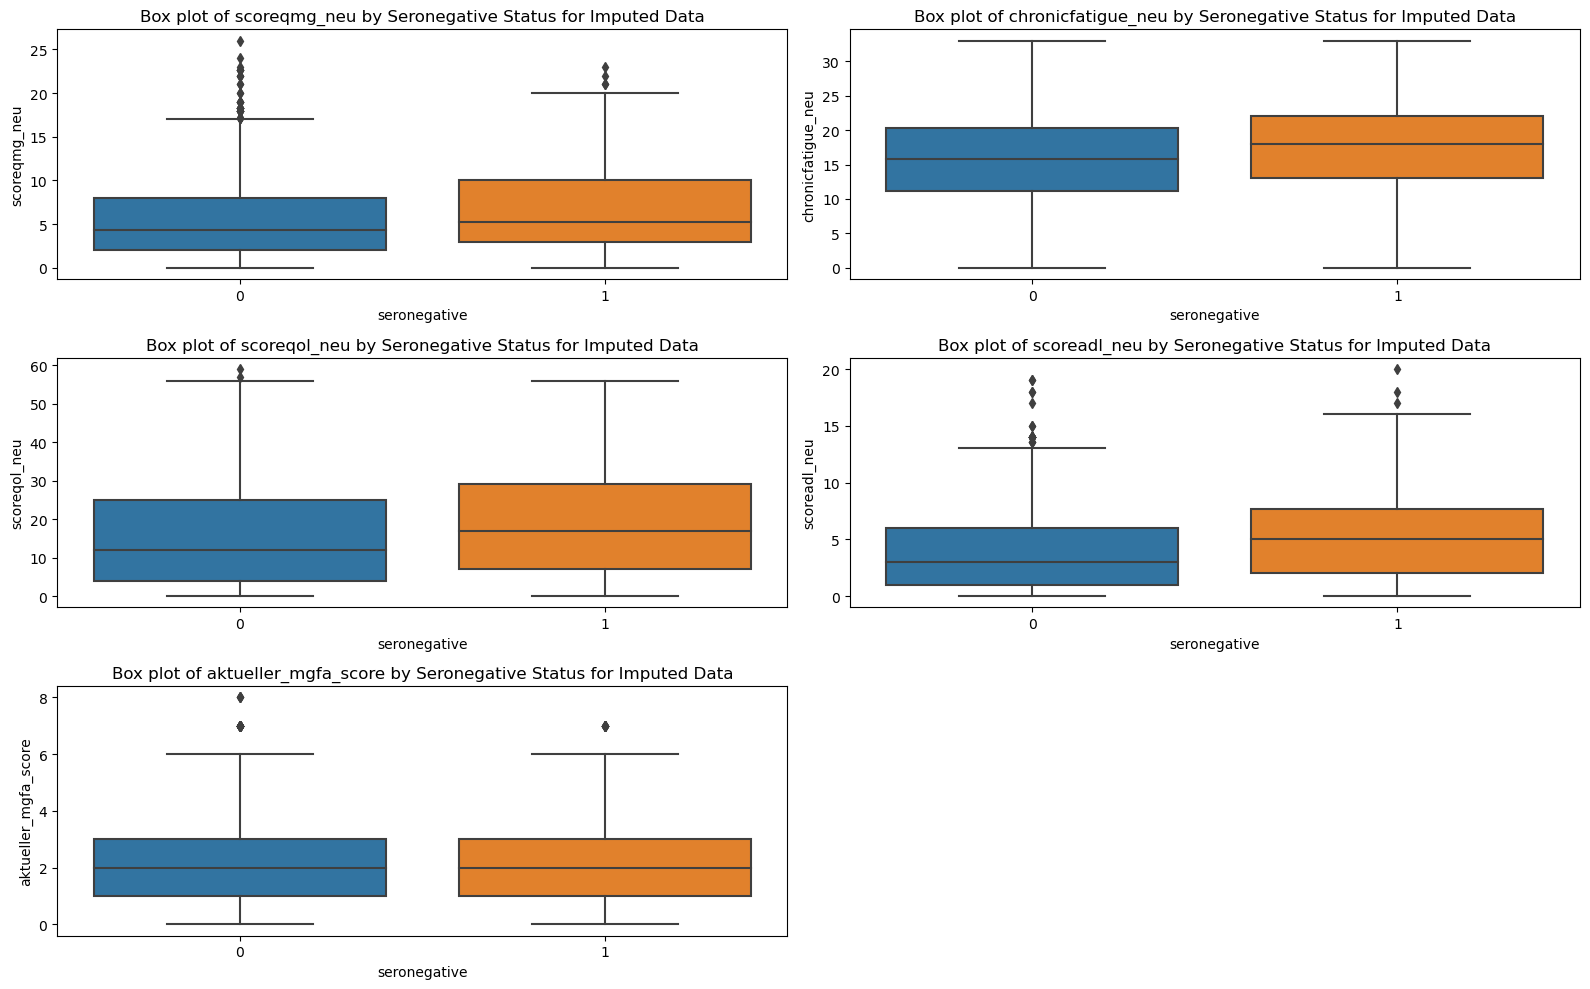

In [14]:
# Plotting boxplots for imputed data
plt.figure(figsize=(16, 10))

for i, col in enumerate(score_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='seronegative', y=col, data=df_imputed_dataset)
    plt.title(f'Box plot of {col} by Seronegative Status for Imputed Data')

plt.tight_layout()
plt.show()

# Frequency distribution of Seronegative for both Original & Imputed data

Frequencies for seronegative:
 seronegative
0.0    1620
1.0     491
Name: count, dtype: int64 



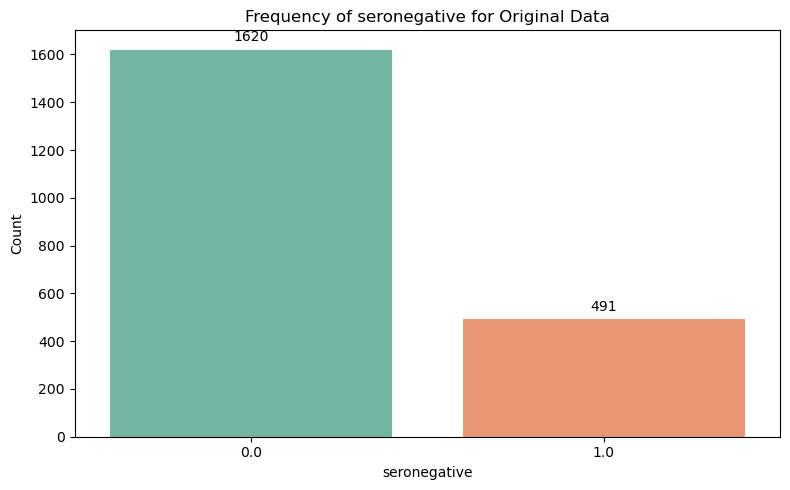

In [15]:
col = 'seronegative'

if col in df_original.columns:
    # Calculate the frequency of each unique value in 'seronegative'
    print(f"Frequencies for {col}:\n", df_original[col].value_counts(), "\n")
    
    # Plot the distribution of 'seronegative' as a bar plot
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=df_original[col], palette='Set2')
    plt.title(f"Frequency of {col} for Original Data")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    
    # Add numerical values to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.show()
else:
    print(f"'{col}' column is not present in the dataset.")

Frequencies for seronegative:
 seronegative
0    1717
1     516
Name: count, dtype: int64 



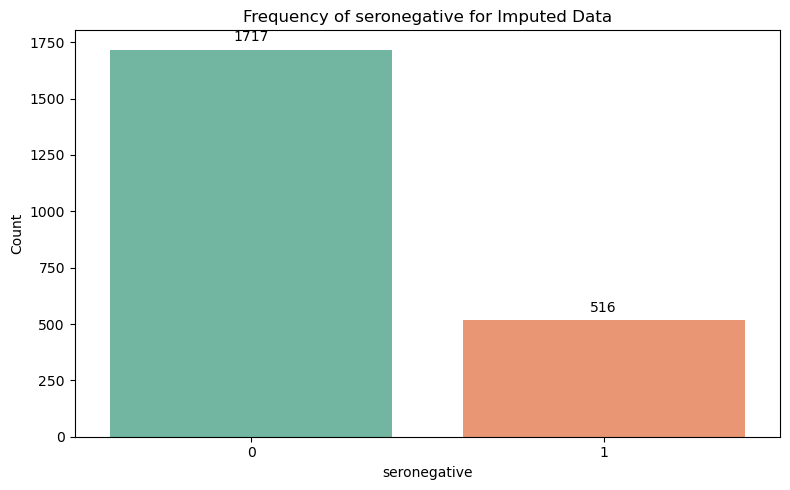

In [16]:
col = 'seronegative'

if col in df_imputed_dataset.columns:
    # Calculate the frequency of each unique value in 'seronegative'
    print(f"Frequencies for {col}:\n", df_imputed_dataset[col].value_counts(), "\n")
    
    # Plot the distribution of 'seronegative' as a bar plot
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=df_imputed_dataset[col], palette='Set2')
    plt.title(f"Frequency of {col} for Imputed Data")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    
    # Add numerical values to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.show()
else:
    print(f"'{col}' column is not present in the dataset.")